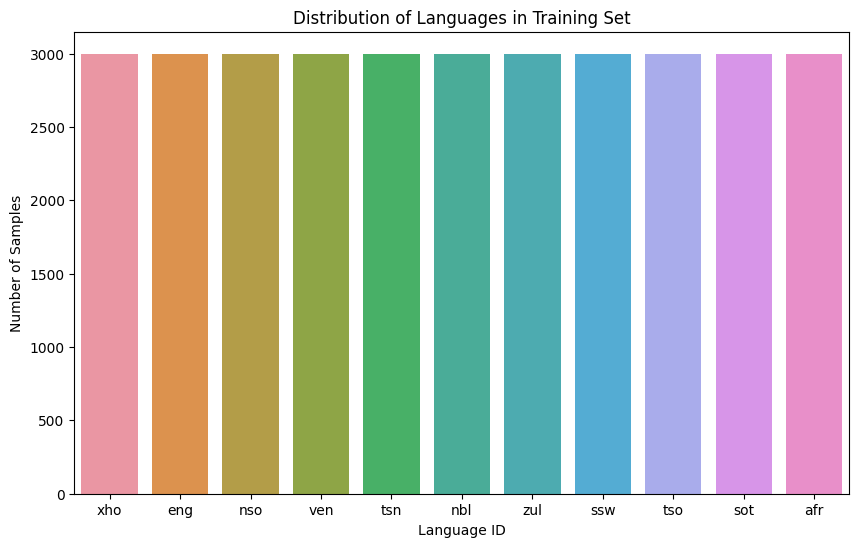

f1: 0.9928822174598138


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

# Load the datasets
train_set_path ='/kaggle/input/'\
'south-african-language-identification-hack-2023/'\
'train_set.csv'
test_set_path ='/kaggle/input/'\
'south-african-language-identification-hack-2023/'\
'test_set.csv'
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

# Checking the distribution of languages in the training set
language_distribution = train_set['lang_id'].value_counts()

# Basic text preprocessing
train_set['text'] =\
train_set['text']\
.str.lower().str.replace(r'\W', ' ').str.replace(r'\s+', ' ', regex=True)

# EDA: Displaying the distribution of languages
plt.figure(figsize=(10, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values)
plt.title('Distribution of Languages in Training Set')
plt.xlabel('Language ID')
plt.ylabel('Number of Samples')
plt.show()

# Feature Extraction: Optimizing TF-IDF
vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 3),
    min_df=3,
    max_df=0.7
)

# Model Selection: Logistic Regression
model = LogisticRegression(max_iter=1000)

# Creating a pipeline of TF-IDF followed by Logistic Regression
pipeline = make_pipeline(vectorizer, model)

# Splitting the training data into train and validation sets for model evaluation
X_train, X_val, y_train, y_val =\
train_test_split(
    train_set['text'],
    train_set['lang_id'],
    test_size=0.2,
    random_state=42
)

# Training the model with Grid Search for hyperparameter tuning
param_grid = {'logisticregression__C': [0.1, 1, 10]}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_weighted'
)
grid_search.fit(X_train, y_train)

# Predicting on the validation set
val_predictions = grid_search.predict(X_val)

# Calculating the F1 score
f1 = f1_score(y_val, val_predictions, average='weighted')
print("f1:", f1)

# Use the best estimator from grid search to predict on the test set
test_predictions = grid_search.predict(test_set['text'])

# Preparing the submission file
submission = pd.DataFrame({'index': test_set['index'], 'lang_id': test_predictions})

# Saving the submission file
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)